# Introduction

This project is about wrangling data from twitter archive of twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. WeRateDogs has over 4 million followers and has received international media coverage.
In this project, we want to collect data from various sources, assess and clean efficiently to use it in our analyses.


# 1- Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
import tweepy 
import json
import os

# 2- Data Gazering
## 2.1 Importing enhanced twitter archive

In [4]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

## 2.2 Downloading the tweet image predictions

In [6]:
#Download tsv file by using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv' , mode = 'wb') as file:
    file.write(response.content)

## 2.3 Getting tweet Data from twitter API

In [12]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# My API keys
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

#Tweepy Query
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids= twitter_archive.tweet_id.values
len(tweet_ids)

#Query twitter api for json data for each tweet id in the twitter archive
count = 0
fails_dict = {}
start = timer()

#Save each tweets returned json as a new line in a .txt file
with open ('tweet_json.txt' , 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ': ' + str(tweet_ids))
        try:
            tweet = api.get_status(tweet_id, tweet_mode= 'extended')
            print('Success')
            json.dump(tweet._json , outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
3: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
4: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
5: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
6: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
7: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
8: [892420643555336193 892177421306343426 891815181378084864 ...,
 66

Success
64: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
65: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
66: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
67: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
68: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
69: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
70: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
71: [892420643555336193 892177421306343426 89181518137

Success
126: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
127: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
128: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
129: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
130: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
131: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
132: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
133: [892420643555336193 892177421306343426 891

Success
187: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
188: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
189: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
190: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
191: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
192: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
193: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
194: [892420643555336193 892177421306343426 891

Success
248: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Fail
249: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
250: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
251: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
252: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
253: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
254: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Fail
255: [892420643555336193 892177421306343426 891815181

Success
310: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
311: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
312: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
313: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
314: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
315: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
316: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
317: [892420643555336193 892177421306343426 891

Success
371: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
372: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
373: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
374: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
375: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
376: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
377: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
378: [892420643555336193 892177421306343426 891

Success
433: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
434: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
435: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
436: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
437: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
438: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
439: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
440: [892420643555336193 892177421306343426 891

Success
494: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
495: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
496: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
497: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
498: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
499: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
500: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
501: [892420643555336193 892177421306343426 891

Success
556: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
557: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
558: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
559: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
560: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
561: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
562: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
563: [892420643555336193 892177421306343426 891

Success
617: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
618: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
619: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
620: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
621: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
622: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
623: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
624: [892420643555336193 892177421306343426 891

Success
678: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
679: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
680: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
681: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
682: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
683: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
684: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
685: [892420643555336193 892177421306343426 891

Success
739: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
740: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
741: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
742: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
743: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
744: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
745: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
746: [892420643555336193 892177421306343426 891

Success
800: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
801: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
802: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
803: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
804: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
805: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
806: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
807: [892420643555336193 892177421306343426 891

Success
861: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
862: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
863: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
864: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
865: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
866: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
867: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
868: [892420643555336193 892177421306343426 891

Success
922: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
923: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
924: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
925: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
926: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
927: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
928: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
929: [892420643555336193 892177421306343426 891

Success
984: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
985: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
986: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
987: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
988: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
989: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
990: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
991: [892420643555336193 892177421306343426 891

Success
1045: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1046: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1047: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1048: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1049: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1050: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1051: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1052: [892420643555336193 89217742130634

Success
1107: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1108: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1109: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1110: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1111: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1112: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1113: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1114: [892420643555336193 89217742130634

Success
1169: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1170: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1171: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1172: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1173: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1174: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1175: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1176: [892420643555336193 89217742130634

Success
1231: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1232: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1233: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1234: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1235: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1236: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1237: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1238: [892420643555336193 89217742130634

Success
1292: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1293: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1294: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1295: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1296: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1297: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1298: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1299: [892420643555336193 89217742130634

Success
1354: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1355: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1356: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1357: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1358: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1359: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1360: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1361: [892420643555336193 89217742130634

Success
1416: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1417: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1418: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1419: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1420: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1421: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1422: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1423: [892420643555336193 89217742130634

Success
1478: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1479: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1480: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1481: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1482: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1483: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1484: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1485: [892420643555336193 89217742130634

Success
1539: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1540: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1541: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1542: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1543: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1544: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1545: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1546: [892420643555336193 89217742130634

Success
1600: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1601: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1602: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1603: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1604: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1605: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1606: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1607: [892420643555336193 89217742130634

Success
1662: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1663: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1664: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1665: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1666: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1667: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1668: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1669: [892420643555336193 89217742130634

Success
1724: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1725: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1726: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1727: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Fail
1728: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1729: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1730: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1731: [892420643555336193 89217742130634342

Success
1785: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1786: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1787: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1788: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1789: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1790: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1791: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1792: [892420643555336193 89217742130634

Success
1846: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1847: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1848: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1849: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1850: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1851: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1852: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1853: [892420643555336193 89217742130634

Success
1908: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1909: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1910: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1911: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1912: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1913: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1914: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1915: [892420643555336193 89217742130634

Success
1969: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1970: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1971: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1972: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1973: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1974: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1975: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
1976: [892420643555336193 89217742130634

Success
2030: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2031: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2032: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2033: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2034: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2035: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2036: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2037: [892420643555336193 89217742130634

Success
2092: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2093: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2094: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2095: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2096: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2097: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2098: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2099: [892420643555336193 89217742130634

Success
2154: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2155: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2156: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2157: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2158: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2159: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2160: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2161: [892420643555336193 89217742130634

Success
2215: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2216: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2217: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2218: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2219: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2220: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2221: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2222: [892420643555336193 89217742130634

Success
2276: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2277: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2278: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2279: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2280: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2281: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2282: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2283: [892420643555336193 89217742130634

Success
2337: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2338: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2339: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2340: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2341: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2342: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2343: [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]
Success
2344: [892420643555336193 89217742130634

In [16]:
#Converting .txt file to a data list where each line contains one piece of tweet info
df_list  = []
with open ('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [17]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [21]:
#Creating a dataframe from df_list that contains id, retweet count and favorite count
tweets_info = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

In [22]:
tweets_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,7378,35076
1,892177421306343426,5497,30369
2,891815181378084864,3633,22830
3,891689557279858688,7556,38352
4,891327558926688256,8141,36632


In [23]:
#Changing the name of the id column to tweet_id
tweets_info = tweets_info.rename(columns= {'id':'tweet_id'})
tweets_info.head

<bound method NDFrame.head of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           7378           35076
1     892177421306343426           5497           30369
2     891815181378084864           3633           22830
3     891689557279858688           7556           38352
4     891327558926688256           8141           36632
5     891087950875897856           2728           18467
6     890971913173991426           1765           10730
7     890729181411237888          16515           59058
8     890609185150312448           3780           25416
9     890240255349198849           6401           29001
10    890006608113172480           6425           27987
11    889880896479866881           4359           25429
12    889665388333682689           8760           43672
13    889638837579907072           3913           24550
14    889531135344209921           1976           13837
15    889278841981685760           4653           22906
16    888917238123

In [25]:
#Saving the dataframe to a csv file wihout the index column 
tweets_info.to_csv('tweets_info.csv' , index=False)

In [26]:
#Checking if the file was saved correctly
f = pd.read_csv('tweets_info.csv')
f.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7378,35076
1,892177421306343426,5497,30369
2,891815181378084864,3633,22830
3,891689557279858688,7556,38352
4,891327558926688256,8141,36632


# 3- Assessing Data
Both visual assessing and programmatically assesing were performed for tideness and quality issues. 

In visual assessing, data was scrolled from start to end.

In programmaticcally assessing, various functions were used such as .info(), .describe() and value_counts().

## 3.1 Aseesing twitter archive enhanced data

In [28]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
2005,672272411274932228,NaN,NaN,2015-12-03 04:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippin. He is terrified of his new lit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672272411...,11,10,Pippin,None,None,None,None
1755,678774928607469569,NaN,NaN,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678774928...,11,10,Tug,None,None,None,None
1560,688519176466644993,NaN,NaN,2016-01-17 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688519176...,12,10,None,None,None,pupper,None
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21 +0000,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,None,None,None,None,None
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None


In [30]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [31]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [32]:
twitter_archive[twitter_archive.rating_numerator <10].count()[0]

440

In [33]:
#Checking which ids have rating_numerators < 10
twitter_archive[twitter_archive.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [36]:
#Checking text of tweet_id 749036806121881602 using
twitter_archive.loc[(twitter_archive.tweet_id == 749036806121881602) , 'rating_numerator']

987    8
Name: rating_numerator, dtype: int64

In [37]:
#Checking text of tweet_id 749036806121881602 using row number 987
twitter_archive.loc[987 , 'text']

"This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC"

In [38]:
#Checking for 0 values denominators
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [39]:
#Checking which ids have denominator which is 0 value
twitter_archive[twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [40]:
twitter_archive.loc[313 , 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [42]:
twitter_archive[twitter_archive.rating_denominator != 10].count()[0]

23

In [43]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Buddy               7
an                  7
Daisy               7
Bailey              7
Toby                7
Jack                6
Jax                 6
Milo                6
Koda                6
Stanley             6
Dave                6
Scout               6
Leo                 6
Bella               6
Rusty               6
Oscar               6
Phil                5
                 ... 
Lili                1
Banditt             1
Karl                1
Grizz               1
Tedders             1
Sage                1
Jersey              1
Geno                1
Chef                1
Tommy               1
Yoda                1
Duchess             1
Jeffrie             1
Henry               1
Mason     

## 3.2 Aseesing image predictions data

In [44]:
image_predictions = pd.read_csv('image-predictions.tsv' , sep ='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
2012,879050749262655488,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1,tabby,0.311861,False,window_screen,0.169123,False,Egyptian_cat,0.132932,False
366,672902681409806336,https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg,1,ram,0.374466,False,bighorn,0.159621,False,Arabian_camel,0.111919,False
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
188,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
706,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,llama,0.379624,False,triceratops,0.162761,False,hog,0.084251,False
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
2036,884441805382717440,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True


In [46]:
image_predictions.loc[120 , 'jpg_url']

'https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg'

In [47]:
from IPython.display import Image
Image(url= 'https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg')

In [48]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3.3 Aseesing twitter data from API

In [50]:
tweets_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7378,35076
1,892177421306343426,5497,30369
2,891815181378084864,3633,22830
3,891689557279858688,7556,38352
4,891327558926688256,8141,36632


In [51]:
tweets_info.sample(20)

,tweet_id,retweet_count,favorite_count
1224,711363825979756544,1084,3496
473,813910438903693312,1822,9183
248,843235543001513987,5705,20750
528,805826884734976000,1784,6483
522,806576416489959424,1920,4828
163,859074603037188101,12502,31590
563,800443802682937345,4236,0
665,788412144018661376,5167,15322
2253,667435689202614272,79,284
1166,718234618122661888,945,3716


In [52]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<b>Tideness</b>
- 1- We have 4 seperate columns of dog categories, we shoulld merge them in one column.
- 2- We have 3 datasets, twitter_archive, image_predictions, and tweets_json dataset, we should merge it in one dataframe.

<b>Quality</b>
<b>Enhanced twitter archive</b>
- There are 181 retweets indicated by retweeted_status_id.
- Some dog names are invalid (None, an, &).
- Invalid tweet_id data type.
- invalid timestamp data type.
- Sources difficult to read.
- Some rows have less than 10 rating_denominator.

<b>Image predictions</b>
- Missing photos for some ids.
- Underscores are used in names in columns p1, p2, & p3.
- Some P names start with uppercase letter, other starts with lowercase.

<b>Image predictions</b>
- Missing entries.


# 4- Cleaning Data

## 4.1 Creating copies from dataframes

In [53]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_info_clean = tweets_info.copy()

In [54]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [57]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [58]:
tweets_info_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7378,35076


## 4.2 Cleaning tideness issues

Dog stage data is separated into 4 columns.

<b>Define:</b>

Merge 4 columns into 1 called dog_stage.

<b>Code:</b>

In [59]:
#Extract dog stage from text columns into new dog_stage columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [60]:
#Drop unwanted columns 
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo' , 'floofer' , 'pupper' , 'puppo'])

<b>Test:</b>

In [61]:
twitter_archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

Data is separated into 3 dataframes.

<b>Define:</b>

Merge 3 dataframes into one dataset based on tweet_id.

<b>Code:</b>

In [62]:
#Merging cleaned enhanced twitter archive with cleaned tweets info from twitter API
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_info_clean, on= 'tweet_id' , how= 'left')
#Merging result with cleaned image predictions
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on= 'tweet_id' , how= 'left' )

<b>Test:</b>

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2331 non-null float64
favorite_count                2331 non-null float64
jpg_url                       2075 non-null object
img_num                       2

## 4.3 Cleaning quality issuess
Not quality issues will be cleaned.

There are 181 retweets indicated by retweeted_status_id

<b>Define:</b>
    
Delete rows that represent retweets and all related columns.

<b>Code:</b>


In [66]:
#Keep original tweets that not have retweeted_status_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
retweet_count                 2168 non-null float64
favorite_count                2168 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [67]:
#Delete retweeted columns
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

<b>Test:</b>

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2168 non-null float64
favorite_count           2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

Some dog names are invalid (None, an, &).

<b>Define:</b>

Convert invalid names to NaN and extract the correct names from text columns after named.

<b>Code:</b>

In [75]:
twitter_archive_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
367            Alfie
2238           Alfie
1616           Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
2001           light
1095             mad
852               my
988              not
335              not
1747      officially
1206             old
369              one
924              one
1936             one
993              one
193            quite
169            quite
2326           quite
2030           space
22              such
1797         

In [76]:
#Check for uncleared dog names 
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [77]:
#Replace incorrect names with NaN
twitter_archive_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],np.NaN, inplace =True)

In [78]:
#Put all NaN values in None
twitter_archive_clean['name'].fillna(value="None", inplace=True)

<b>Test:</b>

In [79]:
twitter_archive_clean.name.value_counts()

None         780
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Toby           7
Daisy          7
Jax            6
Koda           6
Bailey         6
Bo             6
Stanley        6
Oscar          6
Bella          6
Chester        5
Buddy          5
Bentley        5
Milo           5
Louis          5
Leo            5
Rusty          5
Scout          5
Dave           5
Maggie         4
Bear           4
            ... 
Batdog         1
Timmy          1
Theo           1
Brandi         1
Gilbert        1
Shelby         1
Hamrick        1
Chesney        1
Jeffrie        1
Tove           1
Koko           1
Jazzy          1
Spanky         1
Eevee          1
Grizzwald      1
Tommy          1
Yoda           1
Duchess        1
Mason          1
Nugget         1
Kallie         1
Wafer          1
Tycho          1
Leela          1
Chef           1
Mo             1
Erik           1
Damon         

Invalid tweet_id data type.

<b>Define:</b>

Correct invalid data type from integer to string.

<b>Code:</b>

In [80]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

<b>Test:</b>

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2168 non-null float64
favorite_count           2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

Invalid timestamp to datetime.

<b>Define:</b>
    
Correct invalid by converting timestamp to datetime.

<b>Code:</b>

In [84]:
#Converting timestamp to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

<b>Test:</b>

In [85]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2168 non-null float64
favorite_count           2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

Sources difficult to read.

<b>Define:</b>
    
Change sources to more readable categories.

<b>Code:</b>

In [88]:
# Remove url from sources
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [89]:
# Change datatype to category
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

<b>Test:</b>

In [90]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [91]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
retweet_count            1987 non-null float64
favorite_count           1987 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf   

Some rows have less than 10 rating_denominator.

<b>Define:</b>
    
Remove rating_denominator which less than 10.

<b>Code:</b>

In [92]:
#check rate that is not 10 
rating_denominator_not_equal_10 = twitter_archive_clean[twitter_archive_clean['rating_denominator']< 10]

In [93]:
rating_denominator_not_equal_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,None,...,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [94]:
twitter_archive_clean.drop([516], inplace=True)
twitter_archive_clean.drop([2335], inplace=True)

<b>Test:</b>

In [95]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']==7.0]
twitter_archive_clean[twitter_archive_clean['rating_denominator']==2.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Missing photos for some ids.

<b>Define:</b>
    
Delete rows with missing photos.

<b>Code:</b>

In [97]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

<b>Test:</b>

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                326 non-null object
retweet_count            1985 non-null float64
favorite_count           1985 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null object
p2                       1992 non-null object
p2_conf   

Underscores are used in names in columns p1, p2, & p3.

<b>Define:</b>

Changing underscore to spaces.

<b>Code:</b>

In [99]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.replace('_' , ' ')
twitter_archive_clean.p2 = twitter_archive_clean.p2.str.replace('_' , ' ')
twitter_archive_clean.p3 = twitter_archive_clean.p3.str.replace('_' , ' ')


<b>Test:</b>

In [101]:
twitter_archive_clean.p1.head(20)

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper towel
4                       basset
5     Chesapeake Bay retriever
6                  Appenzeller
7                   Pomeranian
8                Irish terrier
9                     Pembroke
10                     Samoyed
11              French bulldog
12                    Pembroke
13              French bulldog
14            golden retriever
15                     whippet
16            golden retriever
17            golden retriever
18              Siberian husky
20              French bulldog
Name: p1, dtype: object

In [102]:
twitter_archive_clean.p2.head(20)

0                  bagel
1               Pekinese
2               malamute
3     Labrador retriever
4       English springer
5          Irish terrier
6          Border collie
7             Eskimo dog
8           Irish setter
9               Cardigan
10            Pomeranian
11    Labrador retriever
12              Cardigan
13                 boxer
14    Labrador retriever
15                borzoi
16       Tibetan mastiff
17    Labrador retriever
18            Eskimo dog
20                   pug
Name: p2, dtype: object

In [103]:
twitter_archive_clean.p3.head(20)

0                          banana
1                        papillon
2                          kelpie
3                         spatula
4     German short-haired pointer
5                 Indian elephant
6                       ice lolly
7                        Pembroke
8        Chesapeake Bay retriever
9                       Chihuahua
10                           chow
11                         muzzle
12                        basenji
13      Staffordshire bullterrier
14                        redbone
15                         Saluki
16             Labrador retriever
17                 English setter
18                       malamute
20                   bull mastiff
Name: p3, dtype: object

Some P names start with uppercase letter, other starts with lowercase.

<b>Define:</b>
    
Convert lowercase letters to uppercase letters.

<b>Code:</b>

In [118]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.title()
twitter_archive_clean.p2 = twitter_archive_clean.p2.str.title()
twitter_archive_clean.p3 = twitter_archive_clean.p3.str.title()

<b>Test:</b>

In [119]:
twitter_archive_clean.p1.head(20)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
17            Golden Retriever
18              Siberian Husky
20              French Bulldog
Name: p1, dtype: object

In [120]:
twitter_archive_clean.p2.head(20)

0                  Bagel
1               Pekinese
2               Malamute
3     Labrador Retriever
4       English Springer
5          Irish Terrier
6          Border Collie
7             Eskimo Dog
8           Irish Setter
9               Cardigan
10            Pomeranian
11    Labrador Retriever
12              Cardigan
13                 Boxer
14    Labrador Retriever
15                Borzoi
16       Tibetan Mastiff
17    Labrador Retriever
18            Eskimo Dog
20                   Pug
Name: p2, dtype: object

In [121]:
twitter_archive_clean.p3.head(20)

0                          Banana
1                        Papillon
2                          Kelpie
3                         Spatula
4     German Short-Haired Pointer
5                 Indian Elephant
6                       Ice Lolly
7                        Pembroke
8        Chesapeake Bay Retriever
9                       Chihuahua
10                           Chow
11                         Muzzle
12                        Basenji
13      Staffordshire Bullterrier
14                        Redbone
15                         Saluki
16             Labrador Retriever
17                 English Setter
18                       Malamute
20                   Bull Mastiff
Name: p3, dtype: object

Missing entries.

<b>Define:</b>
    
Delete rows without retweet_count entries    
    
<b>Code:</b>
    

In [122]:
sum(twitter_archive_clean.retweet_count.isnull())

0

In [123]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweet_count.notnull()]

<b>Test:</b>

In [124]:
sum(twitter_archive_clean.retweet_count.isnull())

0

# 5- Storing Data
The last version of the merged data explained in Section 3 was saved and stored as a csv file called 'twitter_archive_master.csv'.

In [125]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# 6- Data Analysis and Visualization
After finishing wrangling part which consist of gathering, assessing, cleaning and saving the given data, now; we can answer some questions by using visualizing.

<b>Find out the dog category with the highest favorites rate:</b>

In this first part ,we want to find out the category which is recorded the highest rate of favorites, after we removing None values, and visualizing the the chart, we can say that , puppo dog recorded the highest rate, then doggo, floofer, and pupper.

In [128]:
import seaborn as sns    
%matplotlib inline
plt.rcParams['figure.figsize']=(12,13)

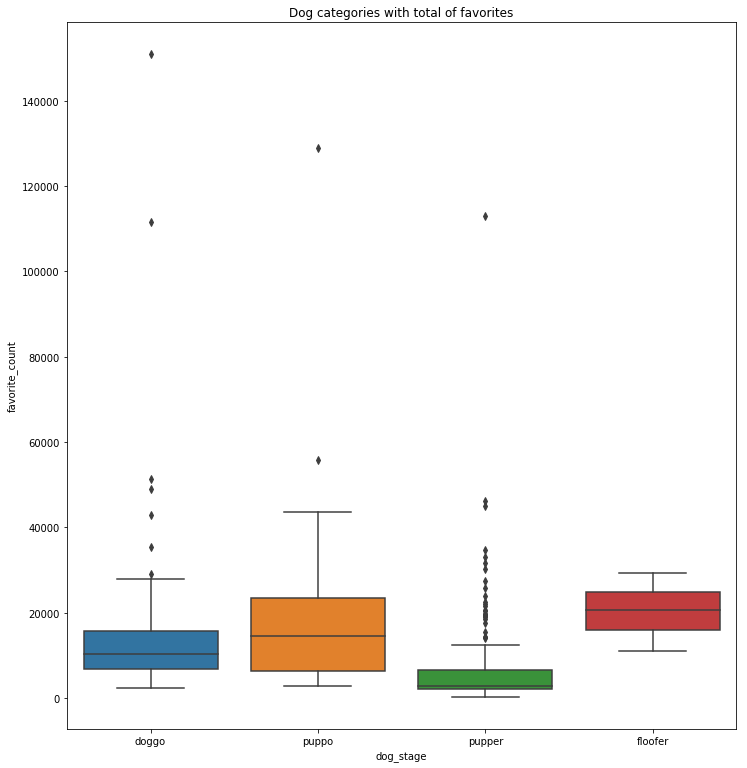

In [130]:
sns.boxplot(x="dog_stage", y="favorite_count", data=twitter_archive_clean).set_title('Dog categories with total of favorites');

<b>Percentage of dog stages:</b>

In [135]:
stage_df = twitter_archive_clean.dog_stage.value_counts()
stage_df

pupper     223
doggo       71
puppo       27
floofer      3
Name: dog_stage, dtype: int64

(-1.1924461883579531,
 1.5232725391460431,
 -1.3300906830815011,
 1.2062279371692364)

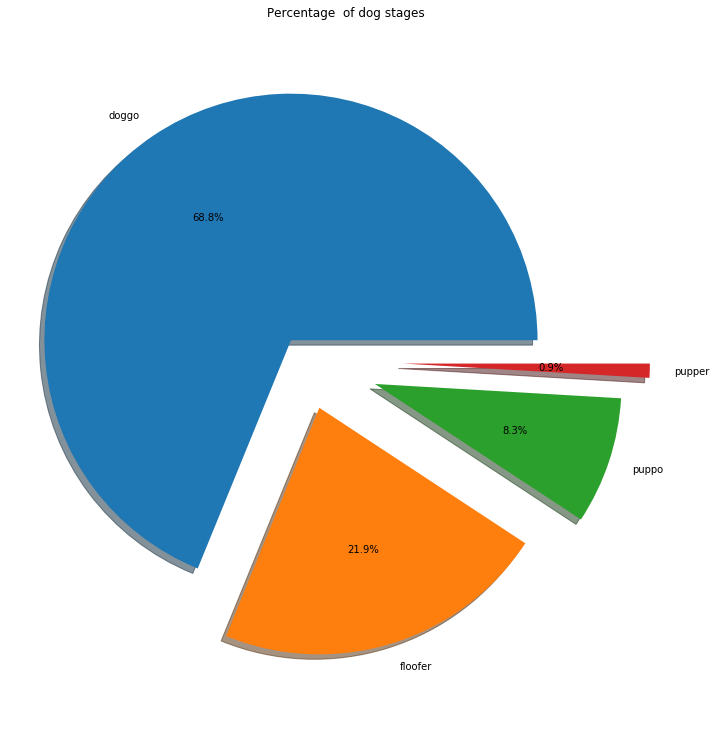

In [136]:
#Creating pie chart
plt.pie(stage_df,
        labels= ['doggo' , 'floofer' , 'puppo' , 'pupper'],
        autopct = '%1.1f%%',
        shadow=True,
        explode=(0.1, 0.2, 0.3, 0.4)
       )
plt.title('Percentage  of dog stages')
plt.axis('equal')

doggo has the highest percentage.

pupper has the lowest percentage.

<b>Find out the top 60 of dog names with retweets rate</b>

In the last part, after removed None values, and removed inappropriate dog names such as ("a", "an", "the", "very", "quite",... we, want to find out the top 60 of dog names which are recorded the highest retweets rating.

As we can see from the chart the name of dog "Duddles" recorded the highest rate of retweets, then the name of dog "Aja".

In [137]:
twitter_archive_clean.drop(twitter_archive_clean.query('(name == "None")').index ,inplace=True)

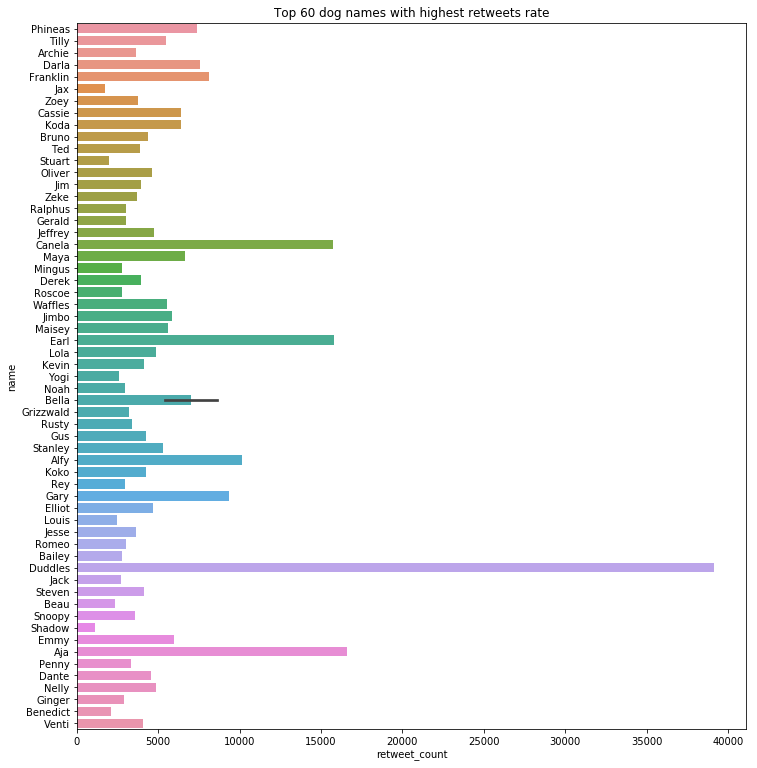

In [139]:
sns.barplot(y="name", x="retweet_count", data = twitter_archive_clean[0:60]).set_title('Top 60 dog names with highest retweets rate');

<b>Relation  between retweet count and favorite count</b>

Text(0,0.5,'Favorite_count')

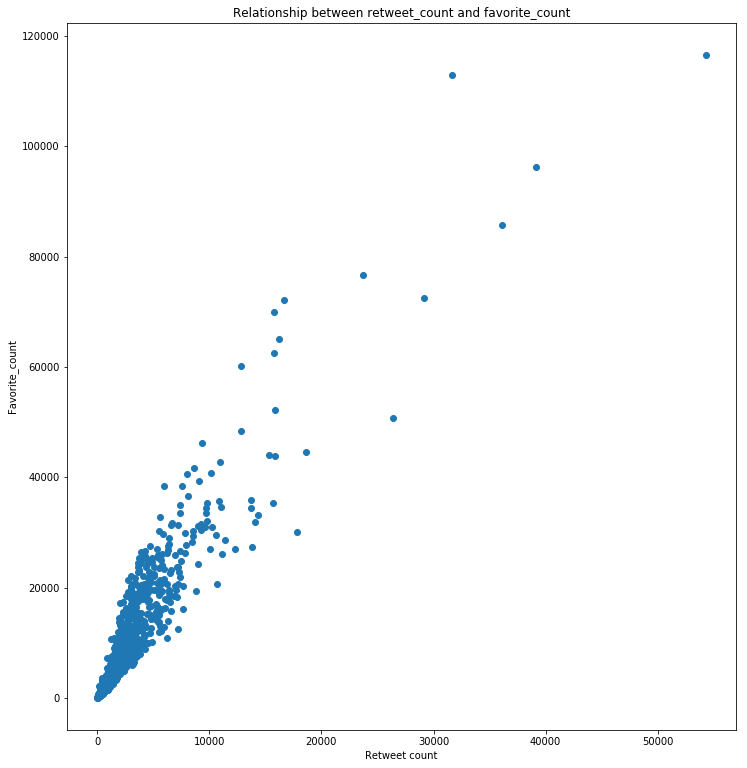

In [141]:
plt.scatter(twitter_archive_clean.retweet_count, twitter_archive_clean.favorite_count)
plt.title('Relationship between retweet_count and favorite_count')
plt.xlabel('Retweet count')
plt.ylabel('Favorite_count')

There is a linear relationship between retweet_count and favorite_count